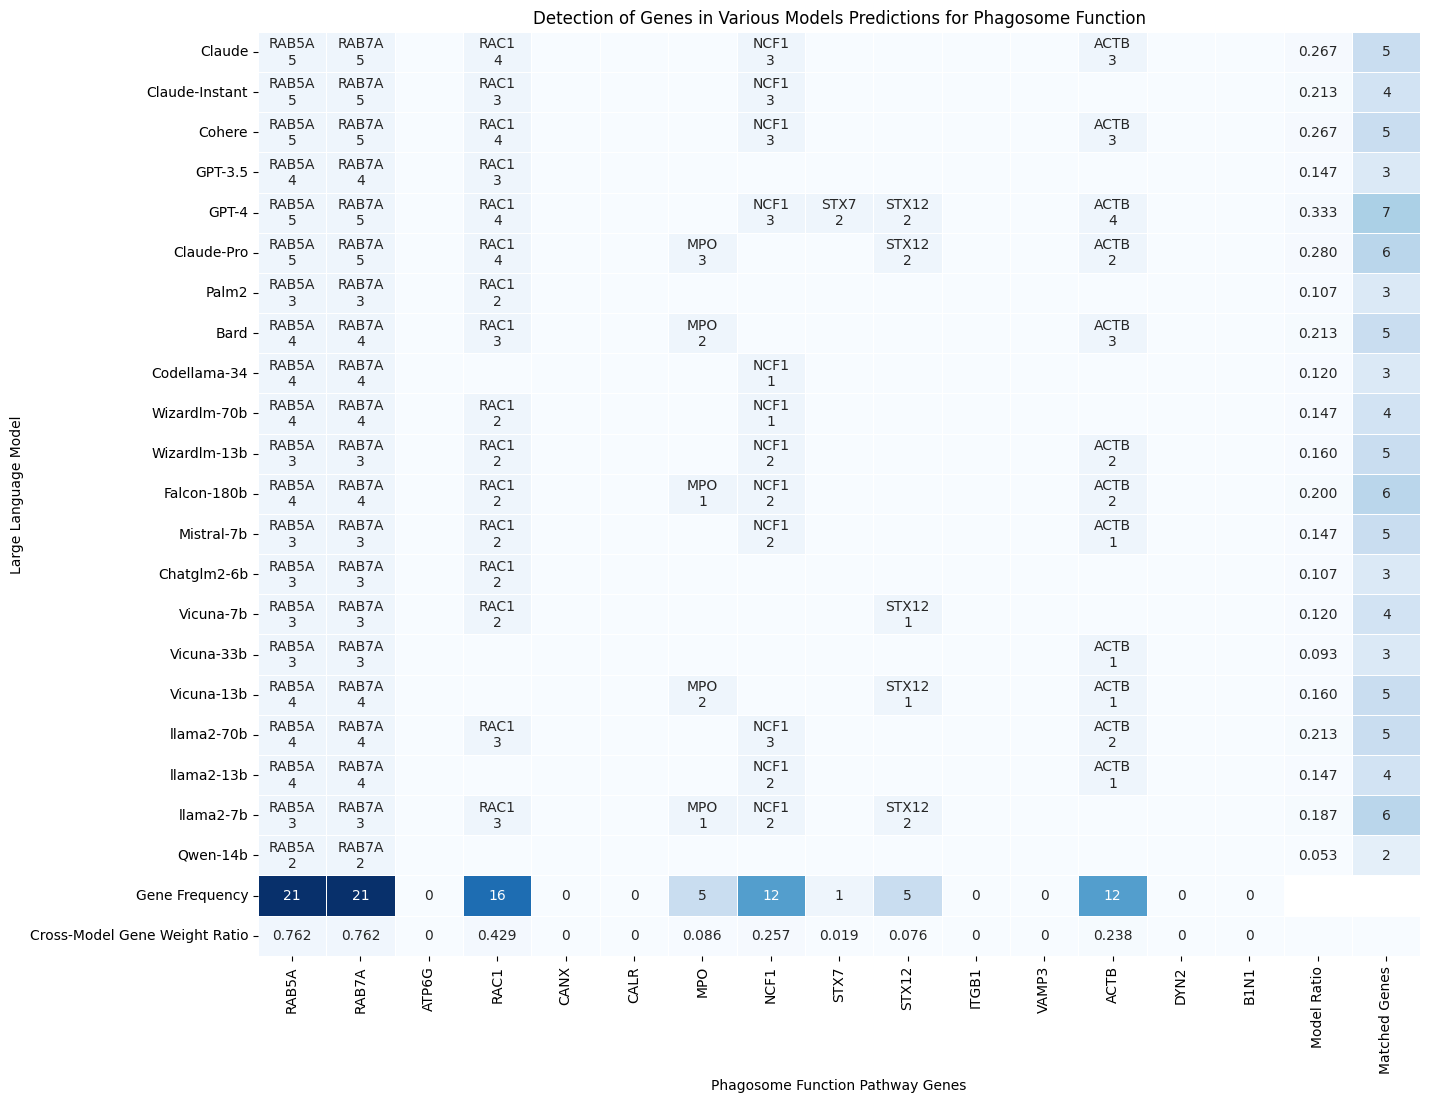

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# True gene answers
true_genes = [
    'RAB5A', 'RAB7A', 'ATP6G', 'RAC1', 'CANX', 'CALR', 'MPO', 'NCF1', 'STX7', 'STX12',
    'ITGB1', 'VAMP3', 'ACTB', 'DYN2', 'B1N1'
]

# Predictions from all models
models = {
    'Claude': [
        'RAB5A', 'RAB7A', 'ATP6V1B2', 'RAC1', 'NCF1', 'HLA-DRA', 'TUBB', 'HYAL1', 'ATP6V0D1',
        'PIK3C3', 'ACTB', 'TUBB', 'AMP2', 'abc', 'xyz'
    ],
    'Claude-Instant': [
        'RAB5A', 'RAB7A', 'CD14', 'RAC1', 'RAB5C', 'LR4', 'ADRA', 'NCF1', 'YAL1', 'TY6V0D1',
        'RAK4', 'FKB2', 'GALS3', 'IRS1', 'ITGB2'
    ],
    'Cohere': [
        'RAB5A', 'RAB7A', 'ATP6AP1', 'RAC1', 'THBS1', 'HS3ST3', 'MPP1', 'NCF1', 'ELABELA',
        'C17orf99', 'AP3M1', 'RAB7', 'ACTB', 'ADRA', 'COPA'
    ],
    'GPT-3.5': [
        'RAB5A', 'RAB7A', 'CD14', 'RAC1', 'CD68', 'CD14', 'RAB11A', 'PLD', 'SRC',
        'TLRs', 'PI3K', 'LAMP1', 'NADPH', 'ITGAM', 'aaa'
    ],
    'GPT-4': [
        'RAB5A', 'RAB7A', 'ATP6V1H', 'RAC1', 'PLCG2', 'MO', 'CTSD', 'NCF1', 'STX7',
        'STX12', 'VTI1B', 'CTS', 'ACTB', 'CYBA', 'LAMP1'
    ],
    'Claude-Pro': [
        'RAB5A', 'RAB7A', 'CDC42', 'RAC1', 'CAT', 'CYBB', 'MPO', 'NCF', 'FOXO4',
        'STX12', 'IL6', 'VAM', 'ACTB', 'GA', 'GAM'
    ],

    'Palm2': [
        'RAB5A', 'RAB7A', 'ATG', 'RAC1', 'ATG9', 'ATG', 'ATG6A', 'ATG16R', 'YAL1',
        'TLRs', 'PI3K', 'LAMP1', 'LAMP1', 'NADPH', 'ITGAM'
    ],
    'Bard': [
        'RAB5A', 'RAB7A', 'CDC42', 'RAC1', 'PLCG2', 'MPO', 'CTSD', 'ELABELA', 'C17orf99',
        'AP3M1', 'RAB7', 'ELABELA', 'ACTB', 'IRS1', 'IRS'
    ],
    'Codellama-34': [
        'RAB5A', 'RAB7A', 'THBS1', 'HS3ST3', 'MPP1', 'NCF1', 'ELABELA', 'C17orf99', 'AP3M1',
        'RAB7', 'THBS1', 'HS3ST3', 'IRS1', 'ITGB2', 'IRS1'
    ],
    'Wizardlm-70b': [
        'RAB5A', 'RAB7A', 'Abc', 'RAC1', 'HS3ST3', 'MPP1', 'NCF1', 'ELABELA', 'C17orf99',
        'AP3M1', 'RAB7', 'ACT', 'ADRA', 'COPA', 'HS3ST3'
    ],
    'Wizardlm-13b': [
        'RAB5A', 'RAB7A', 'Abc', 'RAC1', 'HS3ST3', 'MPP1', 'NCF1', 'HS3ST3', 'MPP1',
        'VTI1B', 'CTS', 'VTI1B', 'ACTB', 'IRS1', 'ITGB2'
    ],
    'Falcon-180b': [
        'RAB5A', 'RAB7A', 'ATP6AP1', 'RAC1', 'THBS1', 'HS3ST3', 'MPO', 'NCF1', 'TLRs',
        'PI3K', 'LAMP1', 'LAMP1', 'ACTB', 'NADPH', 'ITGAM'
    ],
    'Mistral-7b': [
        'RAB5A', 'RAB7A', 'ABC', 'RAC1', 'PLCG2', 'MO', 'CTSD', 'NCF1', 'YAL1',
        'TLRs', 'PI3K', 'LAMP1', 'ACTB', 'IRS1', 'ITGB2'
    ],
    'Chatglm2-6b': [
        'RAB5A', 'RAB7A', 'CD14', 'RAC1', 'CD68', 'CD14', 'RAB11A', 'PLD', 'SRC',
        'TLRs', 'PI3K', 'LAMP1', 'LAMP1', 'NADPH', 'ITGAM'
    ],
    'Vicuna-7b': [
        'RAB5A', 'RAB7A', 'ABC', 'RAC1', 'HS3ST3', 'MP', 'NF1', 'YAL1', 'TLRs',
        'STX12', 'LAMP1', 'AB', 'ACB', 'NADPH', 'ITGAM'
    ],
    'Vicuna-33b': [
        'RAB5A', 'RAB7A', 'ITGB2', 'RA1', 'CD4', 'CD68', 'RAB11A', 'PLD', 'SRC',
        'CD14', 'ACTB', 'IRS1', 'ITGB2', 'aaaa','bbbb'
    ],
    'Vicuna-13b': [
        'RAB5A', 'RAB7A', 'ITGB2', 'RA1', 'HS3ST3', 'MPO', 'NC', 'YAL1', 'TLRs',
        'STX12', 'LAMP1', 'AB', 'ACTB', 'NADPH', 'ITGAM'
    ],
    'llama2-70b': [
        'RAB5A', 'RAB7A', 'ABC', 'RAC1', 'HS3ST3', 'MPP1', 'NCF1', 'ELABELA', 'C17orf99',
        'AP3M1', 'RAB7', 'ACT', 'ACTB', 'LAMP1', 'AB'
    ],
    'llama2-13b': [
        'RAB5A', 'RAB7A', 'HS3ST3', 'MPP1', 'NCF1', 'ELABELA', 'C17orf99', 'AP3M1', 'RAB7',
        'ACT', 'CD68', 'CD14', 'ACTB', 'IRS1', 'ITGB2'
    ],
    'llama2-7b': [
        'RAB5A', 'RAB7A', 'ITGB2', 'RAC1', 'HS3ST3', 'MPO', 'NCF1', 'YAL1', 'TLRs',
        'STX12', 'LAMP1', 'AB', 'ATB', 'NADPH', 'ITGAM'
    ],
    'Qwen-14b': [
        'RAB5A', 'RAB7A', 'CD14', 'RA1', 'CD68', 'CD14', 'RAB11A', 'PLD', 'SRC',
        'TLRs', 'PI3K', 'LAMP1', 'LAMP1', 'NADPH', 'ITGAM'
    ]
}


weights_data = {

    "Claude": [5, 5, 0, 4, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],

    "Claude-Instant": [5, 5, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],

    "Cohere": [5, 5, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0],

    "GPT-3.5": [4, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    "GPT-4": [5, 5, 0, 4, 0, 0, 0, 3, 2, 2, 0, 0, 4, 0, 0],

    "Claude-Pro": [5, 5, 0, 4, 0, 0, 3, 0, 0, 2, 0, 0, 2, 0, 0],

    "Palm2": [3, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    "Bard": [4, 4, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0],

    "Codellama-34": [4, 4, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    "Wizardlm-70b": [4, 4, 0, 2, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0],

    "Wizardlm-13b": [3, 3, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0],

    "Falcon-180b": [4, 4, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0],

    "Mistral-7b": [3, 3, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0],

    "Chatglm2-6b": [3, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Vicuna-7b": [3, 3, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0],

    "Vicuna-33b": [3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],

    "Vicuna-13b": [4, 4, 0,  0, 0, 2, 0, 0,0, 1, 0, 0, 1, 0, 0],

    "llama2-70b": [4, 4, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0],
    "llama2-13b": [4, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    "llama2-7b": [3, 3, 0, 3, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0],
    "Qwen-14b": [2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

}

# Constants
total_genes = 15
scaling_factor = 5
total_models = 21

# Initialize data and annotation dictionaries
data = {'Model': list(models.keys())}
annotation = {'Model': list(models.keys())}
normalized_scores = []  # To store normalized gene match scores for each model

# Initialize sum of weights for each gene
sum_weights_all_genes = {gene: 0 for gene in true_genes}

# Populate the data and annotation dictionaries
for gene in true_genes:
    data[gene] = []
    annotation[gene] = []

for model, predictions in models.items():
    sum_matched_gene_weights = 0  # Initialize sum of weights for this model
    for gene in true_genes:
        if gene in predictions:
            weight = weights_data[model][predictions.index(gene)]
            sum_matched_gene_weights += weight  # Add weight to the sum
            sum_weights_all_genes[gene] += weight  # Add to total sum for each gene
            data[gene].append(1)
            annotation[gene].append(f"{gene}\n{weight:.0f}")
        else:
            data[gene].append(0)
            annotation[gene].append("")

    normalized_score = round(sum_matched_gene_weights / (total_genes * scaling_factor), 3)
    normalized_scores.append(normalized_score)

# Create DataFrames from the dictionaries
df = pd.DataFrame(data).set_index('Model')
annotation_df = pd.DataFrame(annotation).set_index('Model')

df['Model Ratio'] = normalized_scores
annotation_df['Model Ratio'] = normalized_scores

annotation_df["Matched Genes"] = df.drop("Model Ratio", axis=1).sum(axis=1).astype(int)
df["Matched Genes"] = df.drop("Model Ratio", axis=1).sum(axis=1).astype(int)

gene_frequency = df.drop(["Matched Genes", "Model Ratio"], axis=1).sum()
df.loc['Gene Frequency'] = gene_frequency
annotation_df.loc['Gene Frequency'] = gene_frequency.apply(lambda x: f"\n{x}")

# Calculate and Add Cross-Model Gene Weight Ratio as a new row
cross_model_gene_weight_ratios = {gene: sum_weights_all_genes[gene] / (total_models * 5) for gene in true_genes}
df.loc['Cross-Model Gene Weight Ratio'] = df.columns.map(cross_model_gene_weight_ratios).fillna(0)
annotation_df.loc['Cross-Model Gene Weight Ratio'] = df.loc['Cross-Model Gene Weight Ratio'].apply(lambda x: f"{x:.3f}")

# Exclude the last two columns from the Cross-Model Gene Weight Ratio calculation
df.loc['Cross-Model Gene Weight Ratio', ['Model Ratio', 'Matched Genes']] = 0
annotation_df.loc['Cross-Model Gene Weight Ratio', ['Model Ratio', 'Matched Genes']] = ""

# Custom annotation formatting
def custom_annot(val):
    if pd.isna(val):
        return ""
    try:
        # Check if the value is an integer
        if float(val).is_integer():
            return f"{int(float(val))}"
        return f"{float(val):.3f}"
    except ValueError:
        return val

annot_custom = annotation_df.applymap(custom_annot)

# Plotting the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(df, cmap="Blues", cbar=False, linewidths=.5, annot=annot_custom.values, fmt='s')

plt.title('Detection of Genes in Various Models Predictions for Phagosome Function')
plt.xlabel('Phagosome Function Pathway Genes')
plt.ylabel('Large Language Model')

# Adjust the alignment of x-axis tick labels (gene names)
#plt.xticks(rotation=0.1, ha='Right')  # Rotate the gene names upwards and align them to the right

plt.xticks(rotation=90, ha='center')  # Rotate the gene names vertically

plt.show()

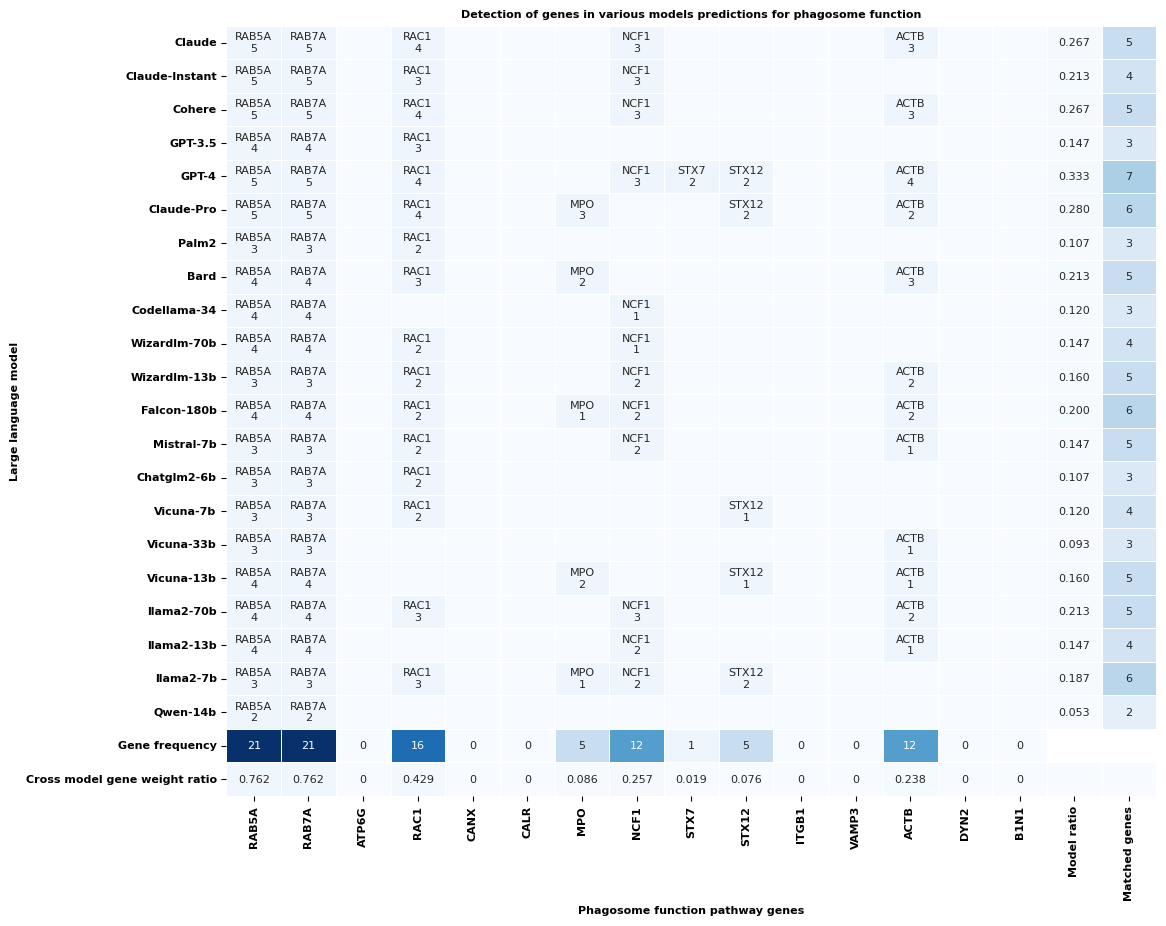

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams


# True gene answers
true_genes = [
    'RAB5A', 'RAB7A', 'ATP6G', 'RAC1', 'CANX', 'CALR', 'MPO', 'NCF1', 'STX7', 'STX12',
    'ITGB1', 'VAMP3', 'ACTB', 'DYN2', 'B1N1'
]

# Predictions from all models
models = {
    'Claude': [
        'RAB5A', 'RAB7A', 'ATP6V1B2', 'RAC1', 'NCF1', 'HLA-DRA', 'TUBB', 'HYAL1', 'ATP6V0D1',
        'PIK3C3', 'ACTB', 'TUBB', 'AMP2', 'abc', 'xyz'
    ],
    'Claude-Instant': [
        'RAB5A', 'RAB7A', 'CD14', 'RAC1', 'RAB5C', 'LR4', 'ADRA', 'NCF1', 'YAL1', 'TY6V0D1',
        'RAK4', 'FKB2', 'GALS3', 'IRS1', 'ITGB2'
    ],
    'Cohere': [
        'RAB5A', 'RAB7A', 'ATP6AP1', 'RAC1', 'THBS1', 'HS3ST3', 'MPP1', 'NCF1', 'ELABELA',
        'C17orf99', 'AP3M1', 'RAB7', 'ACTB', 'ADRA', 'COPA'
    ],
    'GPT-3.5': [
        'RAB5A', 'RAB7A', 'CD14', 'RAC1', 'CD68', 'CD14', 'RAB11A', 'PLD', 'SRC',
        'TLRs', 'PI3K', 'LAMP1', 'NADPH', 'ITGAM', 'aaa'
    ],
    'GPT-4': [
        'RAB5A', 'RAB7A', 'ATP6V1H', 'RAC1', 'PLCG2', 'MO', 'CTSD', 'NCF1', 'STX7',
        'STX12', 'VTI1B', 'CTS', 'ACTB', 'CYBA', 'LAMP1'
    ],
    'Claude-Pro': [
        'RAB5A', 'RAB7A', 'CDC42', 'RAC1', 'CAT', 'CYBB', 'MPO', 'NCF', 'FOXO4',
        'STX12', 'IL6', 'VAM', 'ACTB', 'GA', 'GAM'
    ],

    'Palm2': [
        'RAB5A', 'RAB7A', 'ATG', 'RAC1', 'ATG9', 'ATG', 'ATG6A', 'ATG16R', 'YAL1',
        'TLRs', 'PI3K', 'LAMP1', 'LAMP1', 'NADPH', 'ITGAM'
    ],
    'Bard': [
        'RAB5A', 'RAB7A', 'CDC42', 'RAC1', 'PLCG2', 'MPO', 'CTSD', 'ELABELA', 'C17orf99',
        'AP3M1', 'RAB7', 'ELABELA', 'ACTB', 'IRS1', 'IRS'
    ],
    'Codellama-34': [
        'RAB5A', 'RAB7A', 'THBS1', 'HS3ST3', 'MPP1', 'NCF1', 'ELABELA', 'C17orf99', 'AP3M1',
        'RAB7', 'THBS1', 'HS3ST3', 'IRS1', 'ITGB2', 'IRS1'
    ],
    'Wizardlm-70b': [
        'RAB5A', 'RAB7A', 'Abc', 'RAC1', 'HS3ST3', 'MPP1', 'NCF1', 'ELABELA', 'C17orf99',
        'AP3M1', 'RAB7', 'ACT', 'ADRA', 'COPA', 'HS3ST3'
    ],
    'Wizardlm-13b': [
        'RAB5A', 'RAB7A', 'Abc', 'RAC1', 'HS3ST3', 'MPP1', 'NCF1', 'HS3ST3', 'MPP1',
        'VTI1B', 'CTS', 'VTI1B', 'ACTB', 'IRS1', 'ITGB2'
    ],
    'Falcon-180b': [
        'RAB5A', 'RAB7A', 'ATP6AP1', 'RAC1', 'THBS1', 'HS3ST3', 'MPO', 'NCF1', 'TLRs',
        'PI3K', 'LAMP1', 'LAMP1', 'ACTB', 'NADPH', 'ITGAM'
    ],
    'Mistral-7b': [
        'RAB5A', 'RAB7A', 'ABC', 'RAC1', 'PLCG2', 'MO', 'CTSD', 'NCF1', 'YAL1',
        'TLRs', 'PI3K', 'LAMP1', 'ACTB', 'IRS1', 'ITGB2'
    ],
    'Chatglm2-6b': [
        'RAB5A', 'RAB7A', 'CD14', 'RAC1', 'CD68', 'CD14', 'RAB11A', 'PLD', 'SRC',
        'TLRs', 'PI3K', 'LAMP1', 'LAMP1', 'NADPH', 'ITGAM'
    ],
    'Vicuna-7b': [
        'RAB5A', 'RAB7A', 'ABC', 'RAC1', 'HS3ST3', 'MP', 'NF1', 'YAL1', 'TLRs',
        'STX12', 'LAMP1', 'AB', 'ACB', 'NADPH', 'ITGAM'
    ],
    'Vicuna-33b': [
        'RAB5A', 'RAB7A', 'ITGB2', 'RA1', 'CD4', 'CD68', 'RAB11A', 'PLD', 'SRC',
        'CD14', 'ACTB', 'IRS1', 'ITGB2', 'aaaa','bbbb'
    ],
    'Vicuna-13b': [
        'RAB5A', 'RAB7A', 'ITGB2', 'RA1', 'HS3ST3', 'MPO', 'NC', 'YAL1', 'TLRs',
        'STX12', 'LAMP1', 'AB', 'ACTB', 'NADPH', 'ITGAM'
    ],
    'llama2-70b': [
        'RAB5A', 'RAB7A', 'ABC', 'RAC1', 'HS3ST3', 'MPP1', 'NCF1', 'ELABELA', 'C17orf99',
        'AP3M1', 'RAB7', 'ACT', 'ACTB', 'LAMP1', 'AB'
    ],
    'llama2-13b': [
        'RAB5A', 'RAB7A', 'HS3ST3', 'MPP1', 'NCF1', 'ELABELA', 'C17orf99', 'AP3M1', 'RAB7',
        'ACT', 'CD68', 'CD14', 'ACTB', 'IRS1', 'ITGB2'
    ],
    'llama2-7b': [
        'RAB5A', 'RAB7A', 'ITGB2', 'RAC1', 'HS3ST3', 'MPO', 'NCF1', 'YAL1', 'TLRs',
        'STX12', 'LAMP1', 'AB', 'ATB', 'NADPH', 'ITGAM'
    ],
    'Qwen-14b': [
        'RAB5A', 'RAB7A', 'CD14', 'RA1', 'CD68', 'CD14', 'RAB11A', 'PLD', 'SRC',
        'TLRs', 'PI3K', 'LAMP1', 'LAMP1', 'NADPH', 'ITGAM'
    ]
}


weights_data = {

    "Claude": [5, 5, 0, 4, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],

    "Claude-Instant": [5, 5, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],

    "Cohere": [5, 5, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0],

    "GPT-3.5": [4, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    "GPT-4": [5, 5, 0, 4, 0, 0, 0, 3, 2, 2, 0, 0, 4, 0, 0],

    "Claude-Pro": [5, 5, 0, 4, 0, 0, 3, 0, 0, 2, 0, 0, 2, 0, 0],

    "Palm2": [3, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    "Bard": [4, 4, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0],

    "Codellama-34": [4, 4, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    "Wizardlm-70b": [4, 4, 0, 2, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0],

    "Wizardlm-13b": [3, 3, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0],

    "Falcon-180b": [4, 4, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0],

    "Mistral-7b": [3, 3, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0],

    "Chatglm2-6b": [3, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Vicuna-7b": [3, 3, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0],

    "Vicuna-33b": [3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],

    "Vicuna-13b": [4, 4, 0,  0, 0, 2, 0, 0,0, 1, 0, 0, 1, 0, 0],

    "llama2-70b": [4, 4, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0],
    "llama2-13b": [4, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    "llama2-7b": [3, 3, 0, 3, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0],
    "Qwen-14b": [2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

}

# Constants
total_genes = 15
scaling_factor = 5
total_models = 21

# Initialize data and annotation dictionaries
data = {'Model': list(models.keys())}
annotation = {'Model': list(models.keys())}
normalized_scores = []  # To store normalized gene match scores for each model

# Initialize sum of weights for each gene
sum_weights_all_genes = {gene: 0 for gene in true_genes}

# Populate the data and annotation dictionaries
for gene in true_genes:
    data[gene] = []
    annotation[gene] = []

for model, predictions in models.items():
    sum_matched_gene_weights = 0  # Initialize sum of weights for this model
    for gene in true_genes:
        if gene in predictions:
            weight = weights_data[model][predictions.index(gene)]
            sum_matched_gene_weights += weight  # Add weight to the sum
            sum_weights_all_genes[gene] += weight  # Add to total sum for each gene
            data[gene].append(1)
            annotation[gene].append(f"{gene}\n{weight:.0f}")
        else:
            data[gene].append(0)
            annotation[gene].append("")

    normalized_score = round(sum_matched_gene_weights / (total_genes * scaling_factor), 3)
    normalized_scores.append(normalized_score)

# Create DataFrames from the dictionaries
df = pd.DataFrame(data).set_index('Model')
annotation_df = pd.DataFrame(annotation).set_index('Model')

df['Model ratio'] = normalized_scores
annotation_df['Model ratio'] = normalized_scores

annotation_df["Matched genes"] = df.drop("Model ratio", axis=1).sum(axis=1).astype(int)
df["Matched genes"] = df.drop("Model ratio", axis=1).sum(axis=1).astype(int)

gene_frequency = df.drop(["Matched genes", "Model ratio"], axis=1).sum()
df.loc['Gene frequency'] = gene_frequency
annotation_df.loc['Gene requency'] = gene_frequency.apply(lambda x: f"\n{x}")

# Calculate and Add Cross-Model Gene Weight Ratio as a new row
cross_model_gene_weight_ratios = {gene: sum_weights_all_genes[gene] / (total_models * 5) for gene in true_genes}
df.loc['Cross model gene weight ratio'] = df.columns.map(cross_model_gene_weight_ratios).fillna(0)
annotation_df.loc['Cross model gene weight ratio'] = df.loc['Cross model gene weight ratio'].apply(lambda x: f"{x:.3f}")

# Exclude the last two columns from the Cross-Model Gene Weight Ratio calculation
df.loc['Cross model gene weight ratio', ['Model ratio', 'Matched genes']] = 0
annotation_df.loc['Cross model gene weight ratio', ['Model ratio', 'Matched genes']] = ""

# Custom annotation formatting
def custom_annot(val):
    if pd.isna(val):
        return ""
    try:
        # Check if the value is an integer
        if float(val).is_integer():
            return f"{int(float(val))}"
        return f"{float(val):.3f}"
    except ValueError:
        return val

annot_custom = annotation_df.applymap(custom_annot)

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df, cmap="Blues", cbar=False, linewidths=.5, annot=annot_custom.values, fmt='s', annot_kws={"fontsize": 8, "fontname": "DejaVu Sans"})

plt.title('Detection of genes in various models predictions for phagosome function', fontsize=8, fontname='DejaVu Sans', weight='bold')
plt.xlabel('Phagosome function pathway genes', fontsize=8, fontname='DejaVu Sans', weight='bold')
plt.ylabel('Large language model', fontsize=8, fontname='DejaVu Sans', weight='bold')

# Adjust the alignment of x-axis tick labels (gene names)
plt.xticks(rotation=90, ha='center', fontsize=8, fontname='DejaVu Sans', weight='bold')  # Rotate the gene names vertically
plt.yticks(fontsize=8, fontname='DejaVu Sans', weight='bold')

# Save the figure with specified resolution and color mode
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight', format='png')

plt.show()
